<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
!pip install -q yfinance
!pip install -q hurst

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


In [160]:
# N = 500
# scalar = 10
# t = pd.date_range('2015-07-01', periods=N, freq=BDay())
# x = np.log(np.cumsum(np.random.randn(N) + 1)) + scalar
# x = np.sin(np.random.normal(loc=1, scale=0.03, size=N))

# x = pd.Series(x, index=t)

# plt.figure(figsize=(10,3))
# plt.plot(t,x, label='orginal')
# plt.legend()
# plt.show()

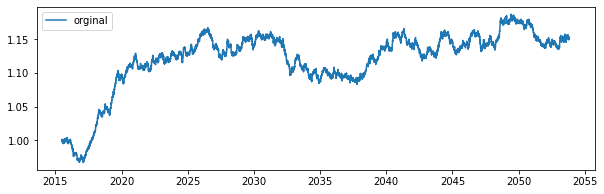

0.594330019108117


In [161]:
N = 9999
scalar = 10
# x = pd.Series(x, index=t)

# x = hurst.random_walk(N, proba=0.5)
t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
x = np.cumprod(random_changes)  # create a random walk from random changes
x = pd.Series(x, index=t)

pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

print(pp[0])

# Zad 1
Wersja biblioteczna

In [162]:
x.describe()

count    9999.000000
mean        1.120507
std         0.045165
min         0.966854
25%         1.104901
50%         1.132495
75%         1.149091
max         1.187702
dtype: float64

In [163]:
print(kurtosis(x))

2.712990451052643


# Zad 2

In [164]:
# E = x.apply(lambda x : entropy(N, base=2)).reset_index()

E = entropy(x, base=2)
print(E)

13.286367855001702


In [165]:
# def hurst(input_ts, lags_to_test=[2, 100]):
#   tau = []
#   lagvec = []

#   # print(None is input_ts)
#   for lag in range(lags_to_test[0], lags_to_test[1]):
#     # pp = np.subtract(input_ts[lag:], input_ts[:-lag])
#     pp = input_ts[lag:] - input_ts[:-lag]
#     # print(pp)
#     # print(input_ts[:-lag])
#     # print(None is pp)
#     lagvec.append(lag)
#     tau.append(np.std(pp))

#   # print(lagvec)
#   # print(tau)

#   m = np.polyfit(lagvec, tau, 1)
#   return m[0]

# print(hurst(series))

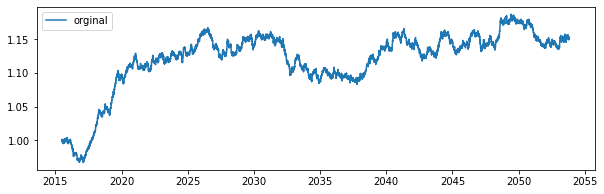

In [166]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [167]:
print(hurst.compute_Hc(x)[0])

0.5749153132968023


In [168]:
# def vectorized_stride_v1(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         np.expand_dims(np.arange(max_time + 1), 0).T
#     )
    
#     # Fancy indexing to select every V rows.
#     return array[sub_windows[::stride_size]]


# def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         # Create a rightmost vector as [0, V, 2V, ...].
#         np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
#     )
    
#     return array[sub_windows]

In [169]:
# vectorized_stride_v2(x, )

In [170]:
# def rolling_window(seq, window_size):
#     it = iter(seq)
#     win = [it.next() for cnt in range(window_size)] # First window
#     yield win
#     for e in it: # Subsequent windows
#         win[:-1] = win[1:]
#         win[-1] = e
#         yield win

# Zad 3


Dla zadania 1


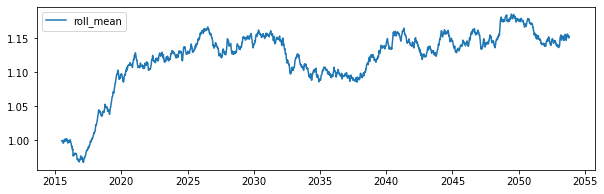

In [171]:
roll_mean = x.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

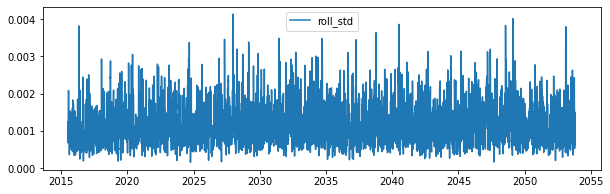

In [172]:
roll_std = x.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

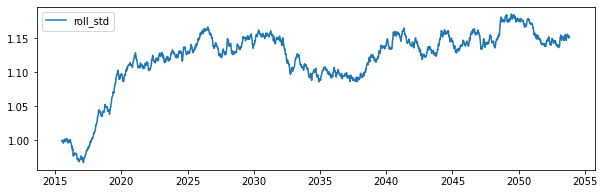

In [173]:
roll_median = x.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

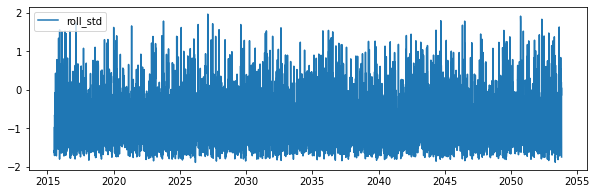

In [174]:
roll_kurtosis = x.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [175]:
def entopy_base_2(data):
    return entropy(data, base=2)

In [176]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

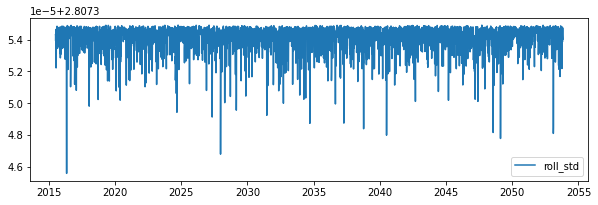

In [177]:
roll_entropy = x.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

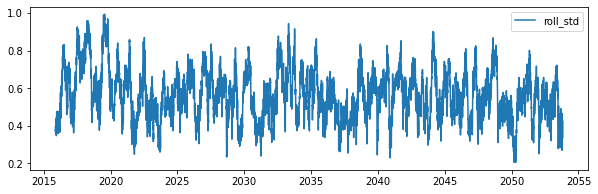

In [178]:
roll_hurst = x.rolling(100).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

# Zad 4

In [184]:
x = x.values.reshape(-1, 1)
normalized = normalize(x, norm='l2')

In [186]:
# roll_entropy = x.rolling(7).apply(entopy_base_2)

# plt.figure(figsize=(10,3))
# plt.plot(t, roll_entropy, label='roll_std')
# plt.legend()
# plt.show()

AttributeError: ignored

In [185]:
scaler = StandardScaler()
scaled = scaler.fit(x)

stand = scaler.fit_transform(x)